# **Analyze Semantic Change (Ngrams)**
## **Goal**: Use trained `Word2vec` embeddings to examine semantic change over time.

### **Imports**

In [22]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

from ngramprep.common.w2v_model import W2VModel
from ngramprep.ngram_analyze.cosine_similarity_time_series import cosine_similarity_over_years, plot_nearest_neighbors
from ngramprep.ngram_analyze.weat_time_series import compute_weat_over_years
from ngramprep.ngram_analyze.semantic_drift import track_local_semantic_change, track_global_semantic_change, track_directional_drift
from ngramprep.ngram_analyze.average_relatedness_by_year import track_word_relatedness

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The `ngram-kit` package contains several tools useful in quantifying how much word meanings have changed over the years. Before using these tools, it helps to set a model path variable. Most commonly, this will point to the `norm_and_align` directory. We'll also set a `corpus_path` variable pointing to the yearly corpus data.

In [3]:
model_path =  '/scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files/models_final/norm_and_align'

### `compare_words_cosim` method

Let's say we want to measure the relationship between three pairs of words — _horse_ and _donkey_, _horse_ and _lizard_ , and _horse_ and _amoeba_ — in the 2019 corpus. We first create a `W2VModel` instance for the 2019 embeddings. Then, we call the `compare_words_cosim` method for our words.

In [7]:
year = 2019
model = W2VModel(f'{model_path}/w2v_y{year}_wbdoc_freq_vs300_w002_mc001_sg1_e010.kv')

word1, word2 = 'horse', 'mare'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'deer'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'ivy'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'atom'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

cos(Φ) of 'horse' and 'mare' in 2019 = 0.6301
cos(Φ) of 'horse' and 'deer' in 2019 = 0.4645
cos(Φ) of 'horse' and 'ivy' in 2019 = 0.1843
cos(Φ) of 'horse' and 'atom' in 2019 = 0.1208


The results are about what you'd expect!

### `compare_models_cosim` method
Suppose we want to compare the semantic similarity of the _same_ words across _models_. We can use the `compare_models_cosim` method to compute the average cosine similarity between shared words in two models. Or, if we specify the `word` parameter, we can compute similarity for a single word across the models.

In [11]:
year = 2000
model = W2VModel(f'{model_path}/w2v_y{year}_wbdoc_freq_vs300_w002_mc001_sg1_e010.kv')
reference_model = W2VModel(f'{model_path}/w2v_y1990_wbdoc_freq_vs300_w002_mc001_sg1_e010.kv')

cosim_mean, cosim_sd, shared_words = model.compare_models_cosim(reference_model)
print(f"Overall similarity between models:\n  cos(Φ) mean = {cosim_mean:.4f}\n  cos(Φ) SD = {cosim_sd:.4f}\n  shared words: {shared_words}\n")

word = 'horse'
cosim, _, _ = model.compare_models_cosim(reference_model, word)
print(f"Similarity of \'{word}\' between models:\n  cos(Φ) = {cosim:.4f}\n")

Overall similarity between models:
  cos(Φ) mean = 0.7587
  cos(Φ) SD = 0.0714
  shared words: 29636

Similarity of 'horse' between models:
  cos(Φ) = 0.8649



### `mean_cosine_similarity_to_all` method

In [12]:
year = 2000
model = W2VModel(f'{model_path}/w2v_y{year}_wbdoc_freq_vs300_w002_mc001_sg1_e010.kv')

mean_sim = model.mean_cosine_similarity_to_all('person', '')

print(f"Mean cosine similarity = {mean_sim:.4f}")

Mean cosine similarity = 0.1386


### `track_local_semantic_change` function

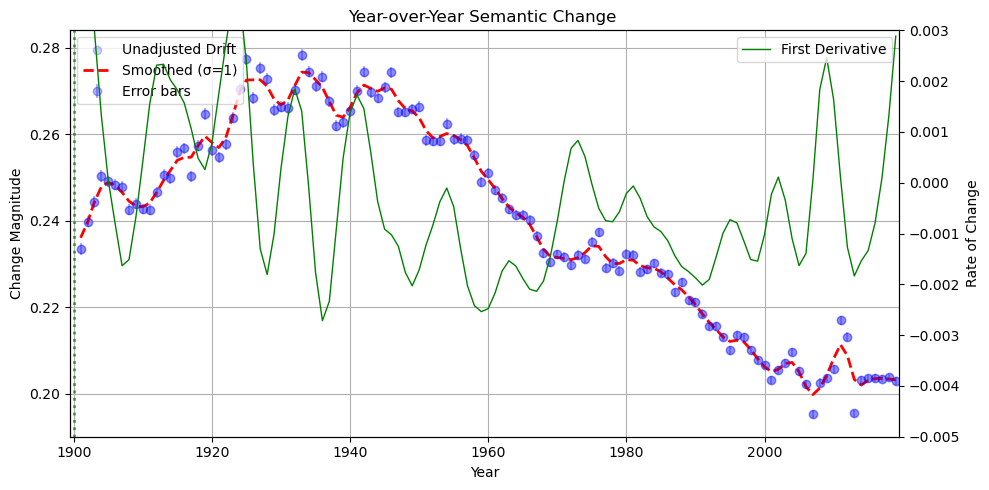

In [16]:
drift_scores = track_local_semantic_change(
    start_year=1900,
    end_year=2019,
    year_step=1,
    model_dir=model_path,
    plot=True,
    error_type='CI',
    smooth=True,
    sigma=1,
    confidence=0.99
)

### `track_global_semantic_change` function

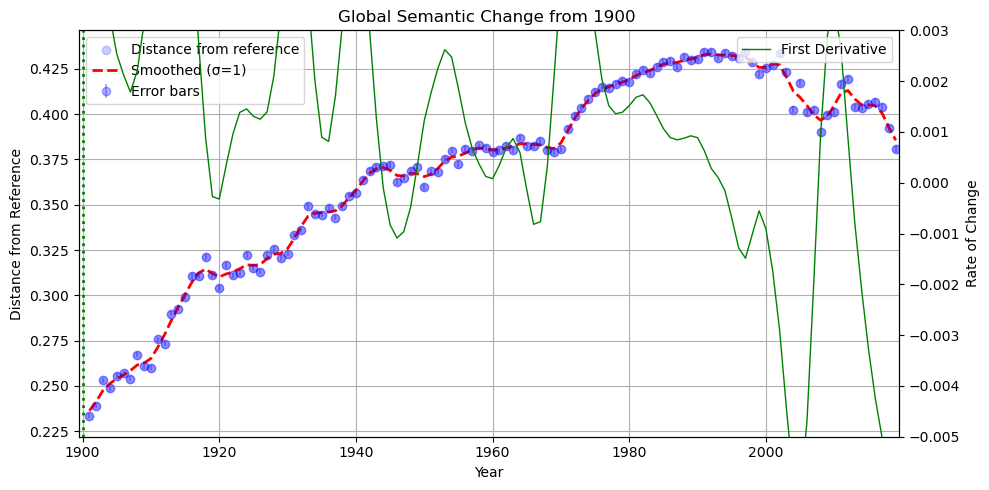

In [19]:
drift_scores = track_global_semantic_change(
    start_year=1900,
    end_year=2019,
    year_step=1,
    model_dir=model_path,
    plot=True,
    error_type='CI',
    smooth=True,
    sigma=1,
    confidence=0.99
)

### `track_word_relatedness` function

The `cosine_similarity_time_series` function uses the `compare_words_cosim` method to track the relationship between a pair of words across time. Simply specify your two words (`word1` and `word2`), a `start_year` and `end_year`, and the model directory. You'll get a list of years and associated cosine similarities; set `plot=True` if you want to graph them. The model will skip any years for which there is no model or there words aren't in the models' shared vocabulary.

Computing mean cosine similarity for 6 words (Excluding: 0 words)


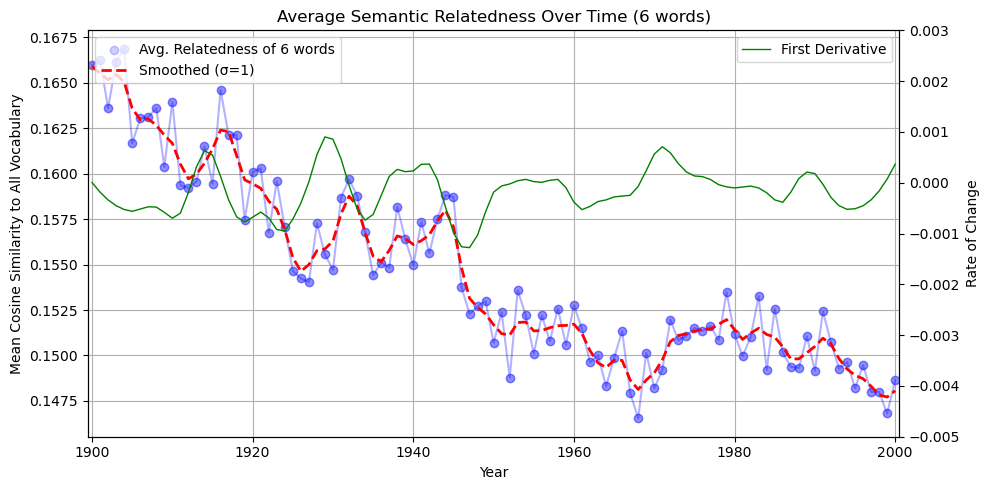

In [24]:
relatedness_scores = track_word_relatedness(
    word=['poor', 'penniless', 'needy', 'destitute', 'beggar', 'panhandle'],
    start_year=1900,
    end_year=2000,
    year_step=1,
    model_dir=model_path,
    plot=1,
    smooth=True,
    sigma=1
)

### `cosine_similarity_over_years` function

The `cosine_similarity_time_series` function uses the `compare_words_cosim` method to track the relationship between a pair of words across time. Simply specify your two words (`word1` and `word2`), a `start_year` and `end_year`, and the model directory. You'll get a list of years and associated cosine similarities; set `plot=True` if you want to graph them. The model will skip any years for which there is no model or there words aren't in the models' shared vocabulary.


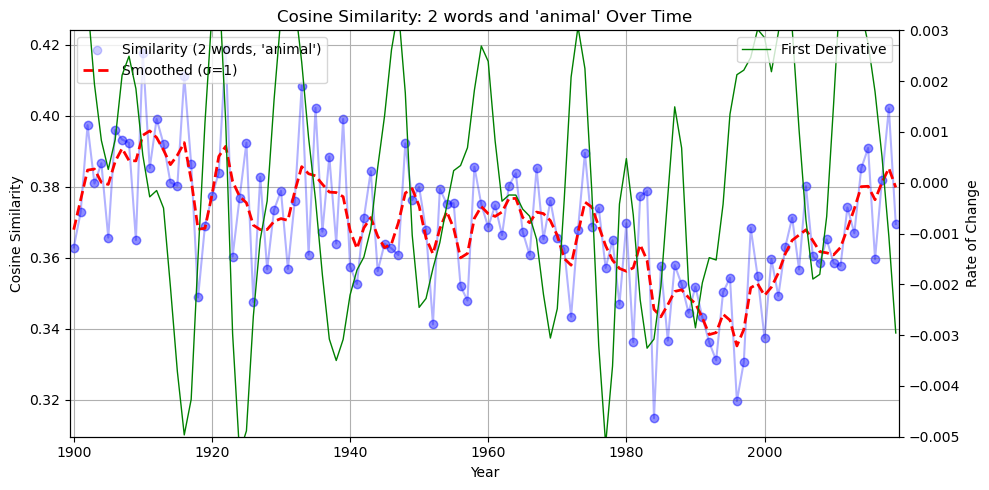

In [28]:
sim_scores = cosine_similarity_over_years(
    word1=['human-being', 'human-beings'],
    word2=['animal'],
    start_year=1900,
    end_year=2019,
    year_step=1,
    model_dir=model_path,
    plot=1,
    smooth=True,
    sigma=1
)

### `track_directional_drift` function

Loading embeddings for word 'queer' across 120 years...


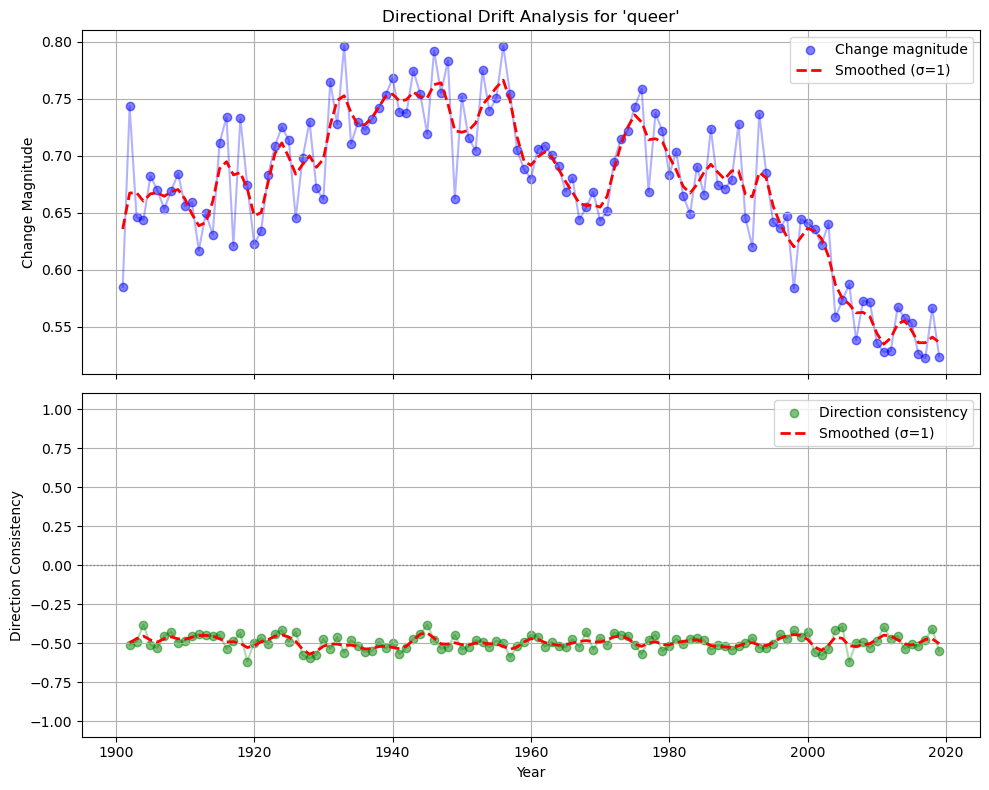

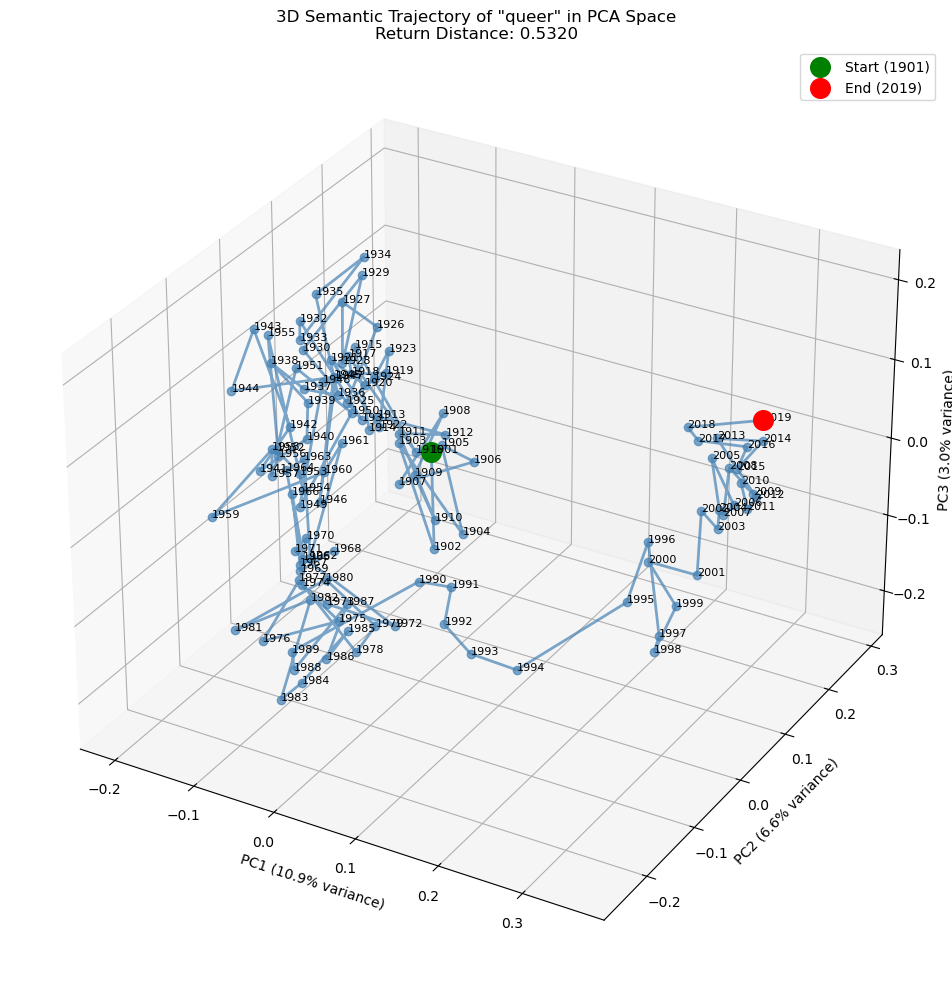

In [35]:
drift_scores = track_directional_drift(
    word='queer',
    start_year=1900,
    end_year=2019,
    year_step=1,
    model_dir=model_path,
    plot=True,
    smooth=True,
    sigma=1,
    plot_trajectory=True,
    trajectory_3d=True
)

Computing average directional drift across shared vocabulary for 120 years...


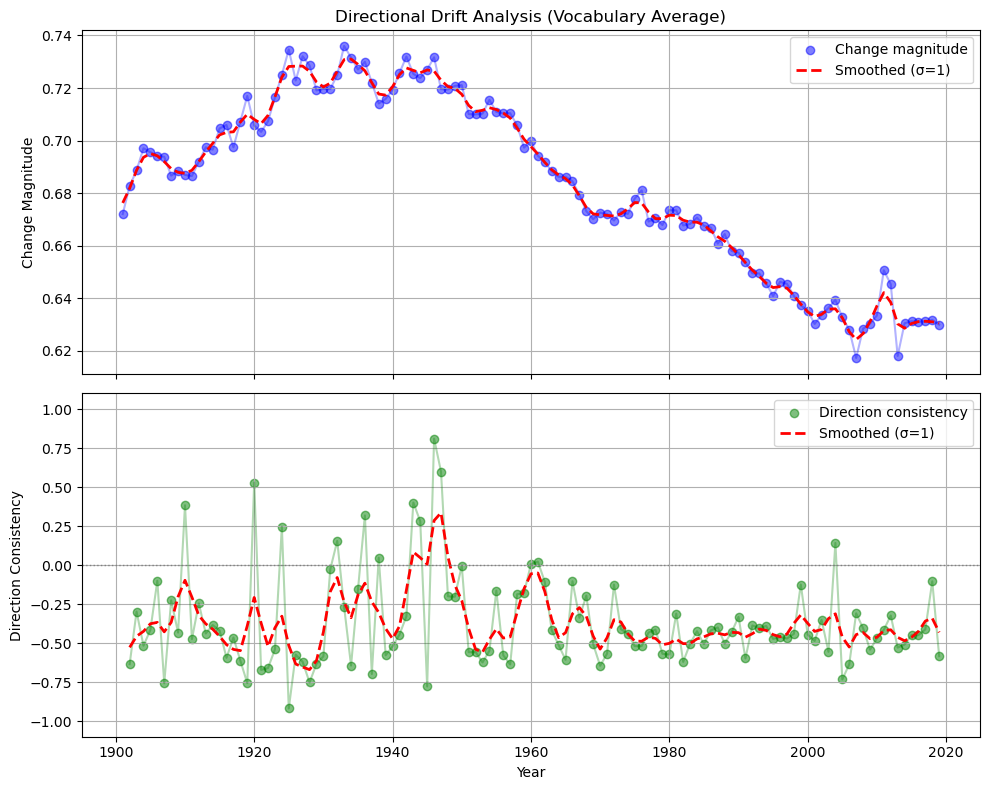

In [38]:
df = track_directional_drift(
    word=None,
    start_year=1900,
    end_year=2019,
    year_step=1,
    model_dir=model_path,
    plot=True,
    smooth=True,
    sigma=1
)

### `compute_weat` method
This method runs a Word Embedding Association Test (WEAT) as described in [Caliskan, Bryson, and Narayanan, 2017](https://www.science.org/doi/10.1126/science.aal4230). The WEAT is a close analog of the Implicit Association Test (IAT; [Greenwald, McGhee, & Schwarz, 1995](https://psycnet.apa.org/record/1998-02892-004))—but, whereas the IAT uses reaction latencies to measure a person's cognitive association between two mental category constrasts, the WEAT uses cosine similarities to measure the semantic association between linguistic category contrasts in a corpus.

Just as with the IAT, the WEAT requires that you select two constrasting "target" categories (e.g., _man_ vs. _woman_) and two contrasting "attribute" categories (e.g., _science_ vs. _art_), as well as a list of exemplars of each of these four categories. The `compute_weat` method then:
1. calculates the mean of all pairwise cosine similarities among exemplars within each target–attribute combination (e.g., $\bar c_{man, science}$, $\bar c_{man, art}$, $\bar c_{woman, science}$, $\bar c_{woman, art}$),
2. takes the difference in mean similarity between combinations involving the same target (e.g., $\bar c_{man, science} - \bar c_{man, art}$ and $\bar c_{woman, science} - \bar c_{woman, art}$),
3. subtracts these differences from one another (e.g., $[(\bar c_{man, science} - \bar c_{man, art}) - (\bar c_{woman, science} - \bar c_{woman, art})]$), and
4. divides this difference by the pooled standard deviation across all exemplars for all target–attribute pairs.

This calculation yields an effect size, $d$, analogous to that used in IAT research. Higher scores indicate a stronger relative semantic link between the first target and first attribute (e.g., between _man_ and _science_).

In [ ]:
model = W2VModel(f'{model_path}/w2v_y2000_wbdoc_freq_vs300_w002_mc001_sg1_e010.kv')

target1 = ["poor", "poverty"]
target2 = ["rich", "wealthy"]
attribute1 = ["happy", "joy"]
attribute2 = ["unhappy", "miserable"]

weat_score, p = model.compute_weat(
    target1,
    target2,
    attribute1,
    attribute2,
    num_permutations=1_000
)

print(f"WEAT effect size (Cohen's d) = {weat_score:.4f}, p = {p:.4f}")

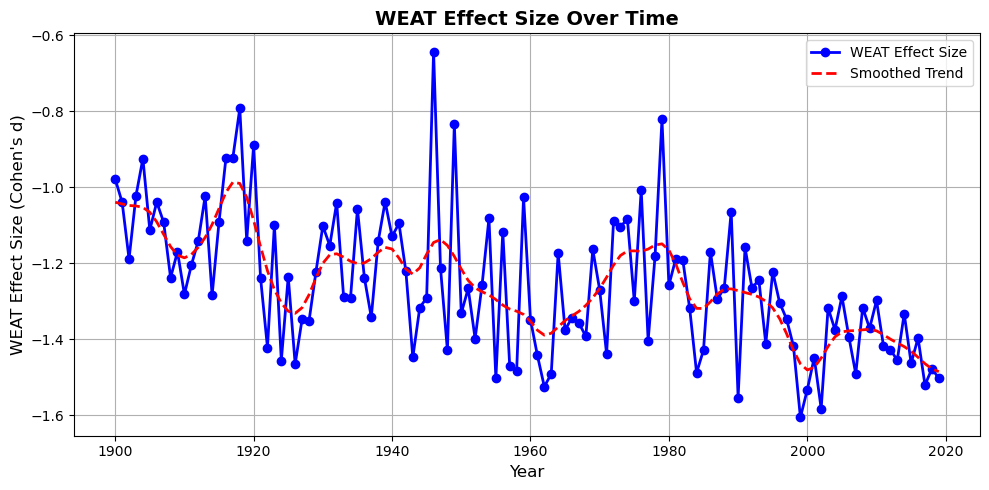

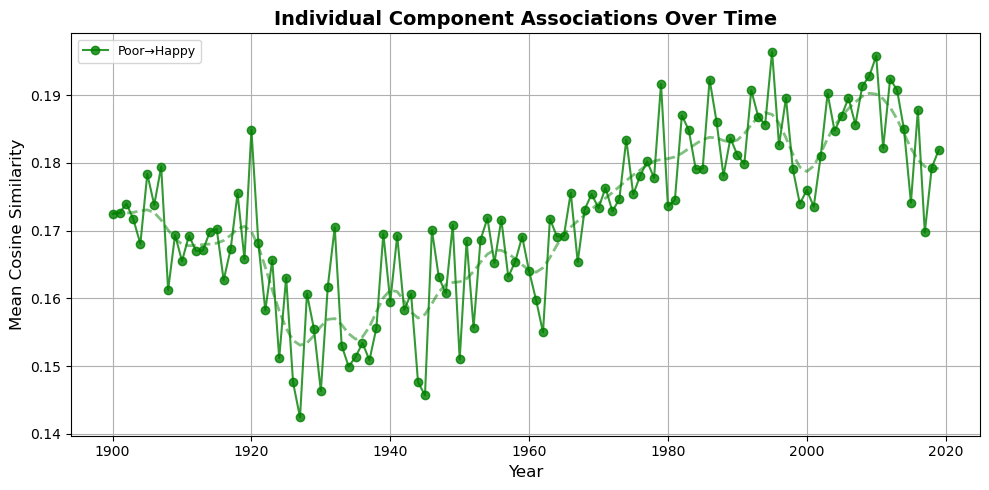

In [62]:
target1 = {'Poor': ['poor', 'penniless', 'needy', 'destitute', 'beggar', 'panhandle']}
target2 = {'Rich': ['rich', 'wealthy', 'affluent', 'millionaire', 'businessman']}
attribute1 = {'Happy': ['happy', 'glad', 'joyous', 'pleasant', 'joyful', 'blissful', 'merry', 'delightful', 'peaceful', 'carefree']}
attribute2 = {'Unhappy': ['unhappy', 'miserable', 'sad', 'sorrowful', 'sorry', 'anxious', 'uneasy', 'angry']}

weat_scores = compute_weat_over_years(
    target1,
    target2,
    attribute1,
    attribute2,
    start_year=1900,
    end_year=2019,
    year_step=1,
    model_dir=f"{model_path}",
    num_permutations=0,
    plot=1,
    smooth=True,
    sigma=2,
    return_std=False,
    return_associations=True,
    plot_associations=['Poor→Happy']
)

### `plot_nearest_neighbors` function

This function plots the N nearest neighbors to a target word for a specific year, showing their cosine similarity scores in a horizontal bar chart.

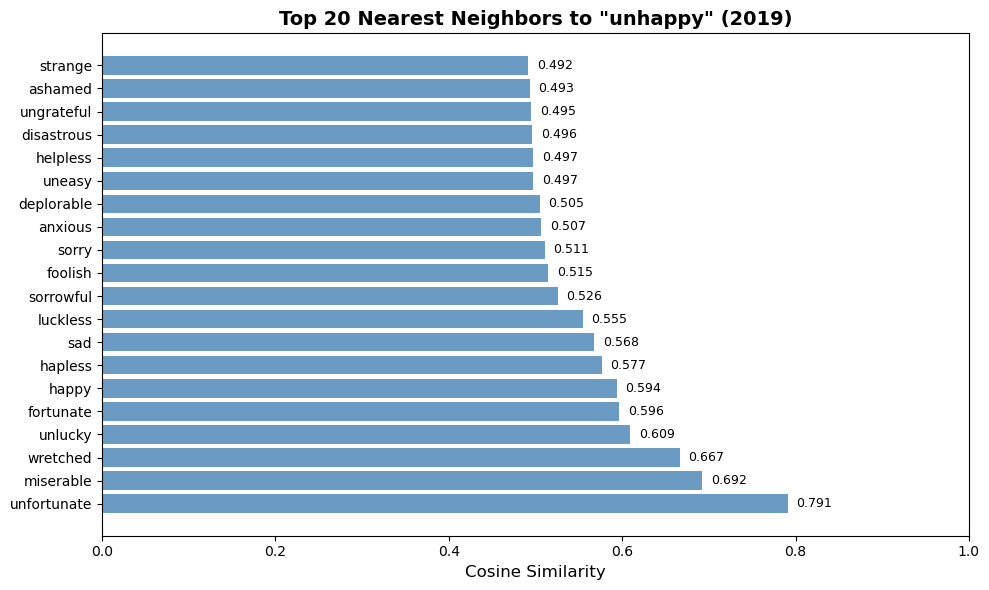


Nearest neighbors:
  unfortunate: 0.7911
  miserable: 0.6920
  wretched: 0.6666
  unlucky: 0.6090
  fortunate: 0.5964
  happy: 0.5937
  hapless: 0.5766
  sad: 0.5679
  luckless: 0.5547
  sorrowful: 0.5256
  foolish: 0.5147
  sorry: 0.5107
  anxious: 0.5067
  deplorable: 0.5046
  uneasy: 0.4974
  helpless: 0.4973
  disastrous: 0.4964
  ungrateful: 0.4953
  ashamed: 0.4933
  strange: 0.4917


In [51]:
neighbors = plot_nearest_neighbors(
    word='unhappy',
    year=2019,
    model_dir=model_path,
    n=20
)

print("\nNearest neighbors:")
for word, similarity in neighbors:
    print(f"  {word}: {similarity:.4f}")